# Bagging演算法測試

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 載入資料集

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True) # load dataset

## 資料分割

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) # split dataset, 20% test, 80% train

## 特徵縮放

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # feature scaling 
X_train_std = scaler.fit_transform(X_train) # fit to training data and transform it
X_test_std = scaler.transform(X_test) # transform test data

## 模型訓練

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

base_estimator = GaussianNB() # base estimator for bagging
clf = BaggingClassifier(estimator=base_estimator, n_estimators=100) # bagging classifier, 100 base estimators
clf.fit(X_train_std, y_train) # fit model
# y_pred = clf.predict(X_test_std) # predict

,estimator,GaussianNB()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


## 模型評估

In [6]:
# 計算準確率
print(f'{clf.score(X_test_std, y_test)*100:.2f}%')

89.47%


## 個別模型評估

In [7]:
nb = GaussianNB()
nb.fit(X_train_std, y_train)
print(f'{nb.score(X_test_std, y_test)*100:.2f}%') 

91.23%


## 模型預測

In [8]:
clf.predict(X_test_std)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0])

## 交叉驗證

In [9]:
from sklearn.model_selection import cross_val_score

clf2 = BaggingClassifier(estimator=base_estimator, n_estimators=50)
scores = cross_val_score(estimator=clf2,
                         X=X_test_std,
                         y=y_test,
                         cv=10,
                         n_jobs=1)
print(f'K折分數: %s' % scores)
print(f'平均值: {np.mean(scores):.2f}, 標準差: {np.std(scores):.2f}')

K折分數: [1.         0.91666667 1.         1.         0.90909091 1.
 1.         0.72727273 0.81818182 0.90909091]
平均值: 0.93, 標準差: 0.09


In [10]:
scores = cross_val_score(estimator=GaussianNB(),
                         X=X_test_std,
                         y=y_test,
                         cv=10,
                         n_jobs=1)
print(f'K折分數: %s' % scores)
print(f'平均值: {np.mean(scores):.2f}, 標準差: {np.std(scores):.2f}')

K折分數: [1.         0.91666667 1.         1.         0.90909091 1.
 1.         0.72727273 0.81818182 0.90909091]
平均值: 0.93, 標準差: 0.09


## 使用較複雜的資料集

In [11]:
from sklearn.datasets import make_classification

# 生成隨機分類資料
X, y = make_classification(n_samples=1000, 
                           n_features=20, n_informative=15, n_redundant=5, 
                           flip_y = 0.3, random_state=5, shuffle=False)

# BaggingClassifier 交叉驗證
base_estimator = GaussianNB()
clf3 = BaggingClassifier(estimator=base_estimator)
scores = cross_val_score(estimator=clf3,
                         X=X,
                         y=y,
                         cv=10,
                         n_jobs=1)
print(f'K折分數: %s' % scores)
print(f'平均值: {np.mean(scores):.2f}, 標準差: {np.std(scores):.2f}')

K折分數: [0.63 0.89 0.89 0.93 0.54 0.59 0.82 0.73 0.8  0.55]
平均值: 0.74, 標準差: 0.14


In [ ]:
scores = cross_val_score(estimator=base_estimator,
                         X=X,
                         y=y,
                         cv=10,
                         n_jobs=1)
print(f'K折分數: %s' % scores)
print(f'平均值: {np.mean(scores):.2f}, 標準差: {np.std(scores):.2f}')

K折分數: [0.63 0.89 0.9  0.93 0.54 0.58 0.82 0.72 0.79 0.56]
平均值: 0.74, 標準差: 0.14


## 參數調校

>1 0.879 (0.035)
>2 0.885 (0.031)
>3 0.888 (0.033)
>4 0.883 (0.035)
>5 0.882 (0.033)
>6 0.885 (0.040)
>7 0.881 (0.038)
>8 0.876 (0.036)
>9 0.879 (0.036)
>10 0.877 (0.035)
>11 0.876 (0.037)
>12 0.877 (0.035)
>13 0.873 (0.033)
>14 0.875 (0.034)
>15 0.874 (0.036)
>16 0.875 (0.030)
>17 0.874 (0.034)
>18 0.875 (0.032)
>19 0.875 (0.037)
>20 0.874 (0.033)


C:\Users\monic\AppData\Local\Temp\ipykernel_14420\3715291407.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


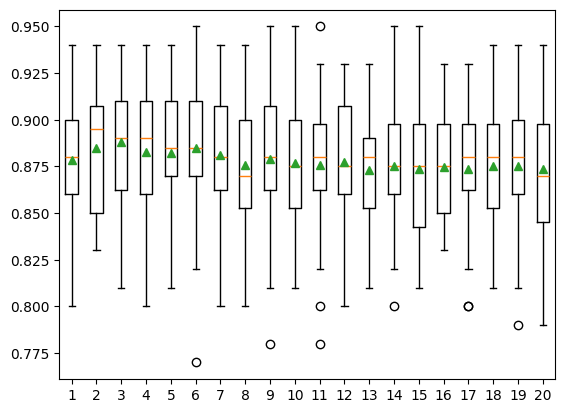

In [ ]:
# explore bagging ensemble k for knn effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict() # 空字典
    # evaluate k values from 1 to 20
    for i in range(1,21):
        # define the base model
        base = KNeighborsClassifier(n_neighbors=i) # n_neighbors = k; k值
        # define the ensemble model
        models[str(i)] = BaggingClassifier(estimator=base) # models[str(i)]是字典
        # 老師的程式是寫base_estimator=base;會發生錯誤
        # 代表BaggingClassifier()的基礎模型; 新版scikit-learn要修改為estimator=base
        # BaggingClassifier() 內可設定參數n_estimators(決策樹數量),max_samples(每棵樹取樣數量),max_features(每棵樹取樣特徵數量) 
        # base_estimator=base; base是KNeighborsClassifier(n_neighbors=i)
        # models[str(i)] = base # 單一KNN
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()